<a href="https://colab.research.google.com/github/francis-100/Smarthealth/blob/main/Smarthealth5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install required packages.
!pip install soundfile

In [8]:
# Clone TensorFlow models repo into a 'models' directory.
!git clone https://github.com/tensorflow/models.git
%cd models/research/audioset/yamnet

Cloning into 'models'...
remote: Enumerating objects: 96720, done.
remote: Total 96720 (delta 0), reused 0 (delta 0), pack-reused 96720
Receiving objects: 100% (96720/96720), 610.81 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (70418/70418), done.
/content/models/research/audioset/yamnet


In [9]:
# Download YAMNet data
!curl -O https://storage.googleapis.com/audioset/yamnet.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.5M  100 14.5M    0     0  55.5M      0 --:--:-- --:--:-- --:--:-- 55.6M


In [10]:
# Imports.
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import params as yamnet_params
import yamnet as yamnet_model
import tensorflow as tf
from google.colab import files

In [11]:
# Load YAMNet model
def load_yamnet_model(weights_path='yamnet.h5'):
    params = yamnet_params.Params()  # Use default params
    class_names = yamnet_model.class_names('yamnet_class_map.csv')
    yamnet = yamnet_model.yamnet_frames_model(params)
    yamnet.load_weights(weights_path)
    return yamnet, class_names

In [12]:
# Extract features using YAMNet
def extract_yamnet_features(audio_data, yamnet_model):
    scores, embeddings, spectrogram = yamnet_model(audio_data)
    return scores.numpy(), embeddings.numpy(), spectrogram.numpy()

In [13]:
# Load YAMNet model
yamnet, class_names = load_yamnet_model()

In [14]:
# Upload audio file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Now you can read the uploaded audio file and process it with YAMNet
audio_data, sr = sf.read(fn)

Saving 03-01-01-01-01-01-01.wav to 03-01-01-01-01-01-01.wav
User uploaded file "03-01-01-01-01-01-01.wav" with length 375720 bytes


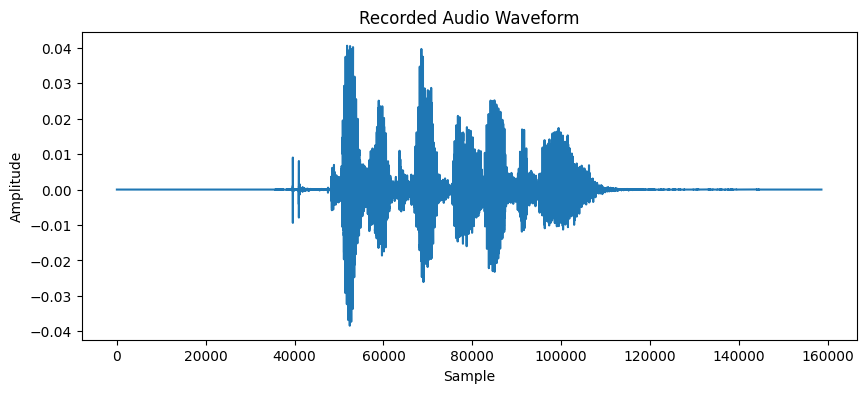

In [15]:
# Visualize the recorded waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Recorded Audio Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# Extract YAMNet features from recorded audio
scores, embeddings, spectrogram = extract_yamnet_features(audio_data, yamnet)

Text(0.5, 0, 'Time')

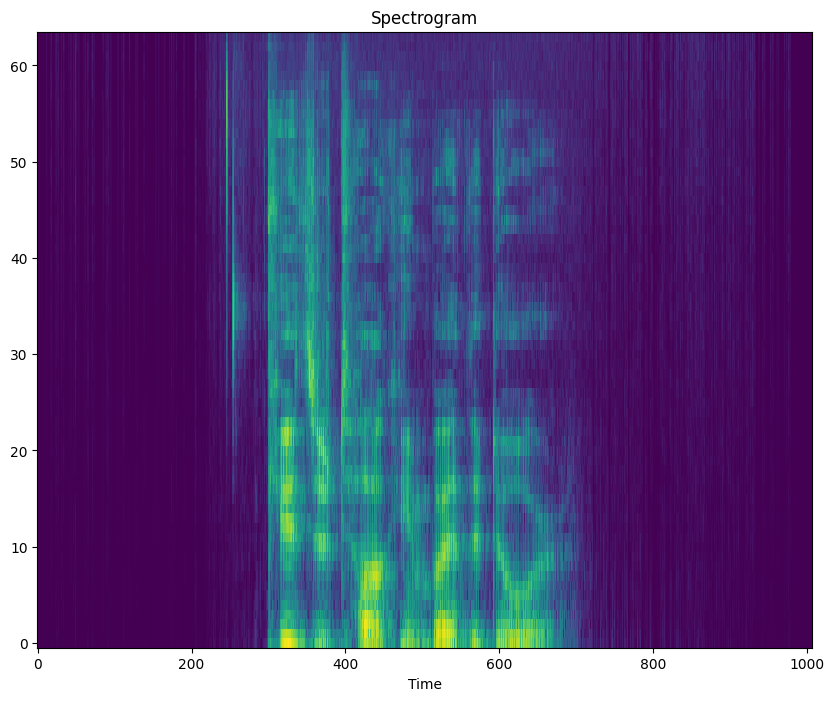

In [18]:
# Visualize YAMNet output
plt.figure(figsize=(10, 8))
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest', origin='lower')
plt.title('Spectrogram')
plt.xlabel('Time')

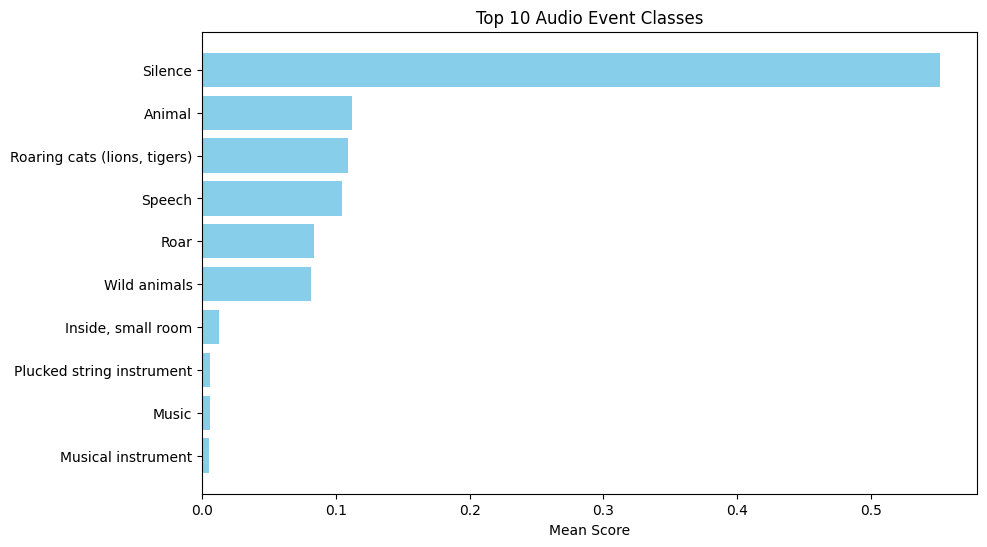

In [19]:
# Plot the top scoring classes
top_N = 10
mean_scores = np.mean(scores, axis=0)
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]

plt.figure(figsize=(10, 6))
plt.barh(range(top_N), mean_scores[top_class_indices], color='skyblue')
plt.yticks(range(top_N), [class_names[i] for i in top_class_indices])
plt.gca().invert_yaxis()
plt.xlabel('Mean Score')
plt.title('Top {} Audio Event Classes'.format(top_N))
plt.show()

In [22]:
# Define distress classes
distress_classes = ['Crying', 'Screaming', 'Shouting']

# Check if any distress class is in top 10 scoring classes
top_class_indices = np.argsort(mean_scores)[::-1][:10]
top_classes = [class_names[i] for i in top_class_indices]

distress_score = 0
for distress_class in distress_classes:
    if distress_class in top_classes:
        distress_score += mean_scores[class_names.index(distress_class)]

# Classify as distress or no distress based on score
if distress_score > 0.5:  # You might need to adjust this threshold
    classification = 'Distress'
else:
    classification = 'No Distress'

print(f'Classification: {classification}, Score: {distress_score}')


Classification: No Distress, Score: 0
